In [25]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
import pyarrow as pa
prithvi_dir = Path('/app/data/interim/v0.40/layer_23')
terramind_dir = Path('/app/data/interim/v0.40/layer_23')

In [26]:
import pyarrow.dataset as ds
from pathlib import Path

data_dir = Path('/app/data/interim/v0.40/layer_23')
dataset = ds.dataset(str(data_dir), format='parquet')


In [48]:
table = dataset.to_table(columns=["embedding"])
emb_list = table.column("embedding")
concatenated = pa.concat_arrays(emb_list.chunks)
values = concatenated.values.to_numpy(zero_copy_only=False)
n_rows = len(concatenated)
embeddings = values.reshape(n_rows, 1024)

In [49]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=50, max_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings)  

In [50]:
embeddings_2d.shape

(1896, 2)

In [52]:
import matplotlib.pyplot as plt

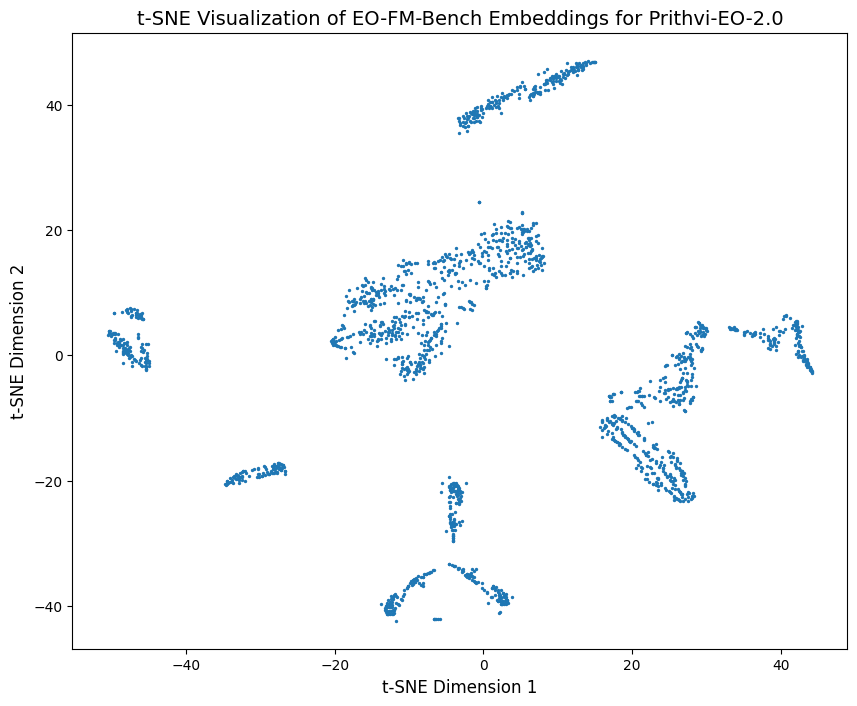

In [54]:
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 1], -embeddings_2d[:, 0], s=2)
plt.title("t-SNE Visualization of EO-FM-Bench Embeddings for Prithvi-EO-2.0", fontsize=14)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
# plt.xlim([-axis_lim, axis_lim])
# plt.ylim([-axis_lim, axis_lim])
# plt.legend(handles=patches, loc="upper left", fontsize=12)
# plt.savefig(output_path / "tsne.png", dpi=600, bbox_inches="tight")
plt.show()